In [1]:
# step 1: Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# step 2: Load the dataset
df  = pd.read_csv(r"C:\Users\rt833\OneDrive\Desktop\Diabetes.csv")
print("First 5 rows of the dataset:")
display(df.head())


First 5 rows of the dataset:


,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62.0,4.9,3.7,1.4,1.1,2.1,NaN,23.0,0
2,1,33,7.1,46.0,4.9,4.9,NaN,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24.0,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50.0,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0


In [3]:
# step 3: Check for missing values
print("Missing value in the dataset:")
print(df.isnull().sum())

Missing value in the dataset:
Gender    0
AGE       0
Urea      0
Cr        1
HbA1c     1
Chol      2
TG        3
HDL       2
LDL       1
VLDL      3
BMI       0
Class     0
dtype: int64


print(df.columns)

In [4]:
# step 4: Encode target variable(if it is catagorical)
print("Target variable unique values:", df['Class'].unique())
le = LabelEncoder()
df['class'] = le.fit_transform(df['Class'])
print("Encoded classes:", dict(zip(le.classes_, le.transform(le.classes_))))

Target variable unique values: [0 1 2]
Encoded classes: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2)}


In [5]:
# step 5: Feature and target separation
x = df.drop('Class', axis=1)
y = df['class']

In [6]:
# step6: Feature scaling(optional but helpful)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [7]:
# step 7: Train_test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=42, stratify=y)

In [8]:
# step 8: Train classifier(Randomforest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
# step 9: Predictions
y_pred = model.predict(X_test)

In [10]:
# step 10: Evaluation 
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

Accuracy Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        26

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



In [11]:
# step 11: confusion Matix
cm = confusion_matrix(y_test, y_pred)

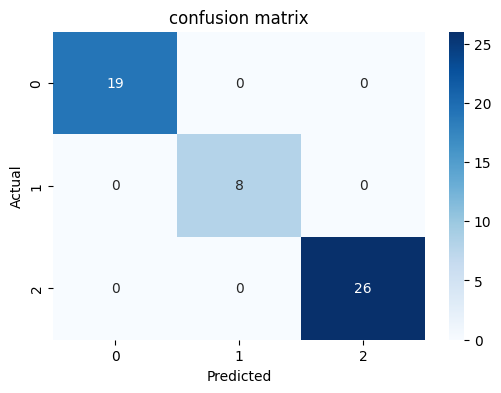

In [12]:

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()